Precios de Musicales en Cartelera (Muestra Curada 2025)

Dataset elaborado a partir de información publicada en las webs oficiales de musicales en cartelera en 2025. Recoge una muestra acotada de 88 musicales, normalizada y verificada mediante conocimiento sectorial del teatro musical. Su objetivo es ofrecer una base de análisis sobre precios y estructura de la oferta actual, no un registro exhaustivo del mercado.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# ============================
# 1. Carga del dataset
# ============================

df = pd.read_csv("precios_musicales_limpio_final.csv")

# ============================
# 2. Revisión inicial
# ============================

print("Shape:", df.shape)
print("\nColumnas:", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nPrimeras filas:")


Shape: (8, 12)

Columnas: ['obra', 'fecha', 'día', 'precio_min', 'precio_max', 'ciudad', 'precio_estandar', 'productora', 'teatro', 'incluye_gastos', 'fuente ', 'diferencia_precios']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   obra                8 non-null      object 
 1   fecha               8 non-null      object 
 2   día                 8 non-null      object 
 3   precio_min          8 non-null      float64
 4   precio_max          8 non-null      float64
 5   ciudad              8 non-null      object 
 6   precio_estandar     8 non-null      float64
 7   productora          8 non-null      object 
 8   teatro              8 non-null      object 
 9   incluye_gastos      7 non-null      object 
 10  fuente              8 non-null      object 
 11  diferencia_precios  8 non-null      float64
dtypes: float64(4), obj

In [3]:
df.head(10)

,obra,fecha,día,precio_min,precio_max,ciudad,precio_estandar,productora,teatro,incluye_gastos,fuente,diferencia_precios
0,El rey león,2025-03-28,sábado,52.92,183.60,Madrid,131.76,Stage,Lope de vega,si,Entradas para El Rey León | Página Oficial,130.68
1,Cenicienta,2025-03-28,sábado,37.99,170.00,Madrid,105.00,Stage,Coliseum,si,Entradas de Cenicienta el Musical | Página Ofi...,132.01
2,Los pilares de la tierra,2025-01-31,sabádo,37.80,110.16,Madrid,73.44,Beón,EDP Gran Vía,si,"Los pilares de la Tierra, el musical | beon. e...",72.36
3,Los miserables,2025-03-28,sábado,49.90,120.00,Madrid,109.90,ATG/SOM,Nuevo Apolo,si,entradas.com,70.10
4,Wicked,2025-03-28,sábado,39.00,119.01,Madrid,103.00,ATG/SOM,Nuevo Alcalá,NaN,https://wickedelmusical.com/entradas/,80.01
5,We will rock you,2025-02-28,sábado,25.00,54.00,Madrid,54.00,GT CXABANK PP,La estación PP,si,"Inicio - WE WILL ROCK YOU, EL MUSICAL",29.00
6,Mamma mia!,2025-03-28,sábado,55.00,75.00,Gira,69.00,ATG/SOM,La Laboral (GiJón),si,MAMMA MÍA! El Musical | Gira Nacional | Página...,20.00
7,"The book of mormon, el musical",2025-01-31,sábado,35.39,86.20,Madrid,77.13,ATG/SOM,Calderón,si,Entradas – THE BOOK OF MORMON El Musical,50.81



Valores nulos por columna:
obra                  0
fecha                 0
día                   0
precio_min            0
precio_max            0
ciudad                0
precio_estandar       0
productora            0
teatro                0
incluye_gastos        1
fuente                0
diferencia_precios    0
dtype: int64

Duplicados: 0

Resumen estadístico de precios:
       precio_min  precio_max  precio_estandar  diferencia_precios
count    8.000000    8.000000         8.000000            8.000000
mean    41.625000  114.746250        90.403750           73.121250
std     10.176609   44.634053        25.938042           41.583652
min     25.000000   54.000000        54.000000           20.000000
25%     37.197500   83.400000        72.330000           45.357500
50%     38.495000  114.585000        90.065000           71.230000
75%     50.655000  132.500000       106.225000           92.677500
max     55.000000  183.600000       131.760000          132.010000


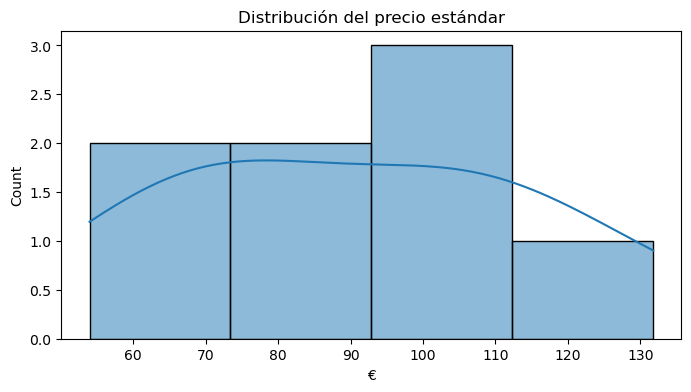

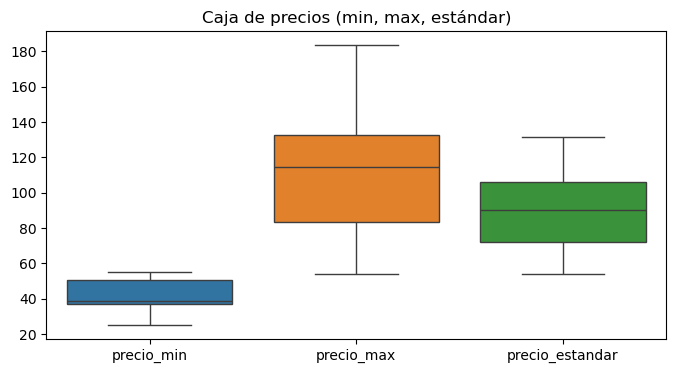

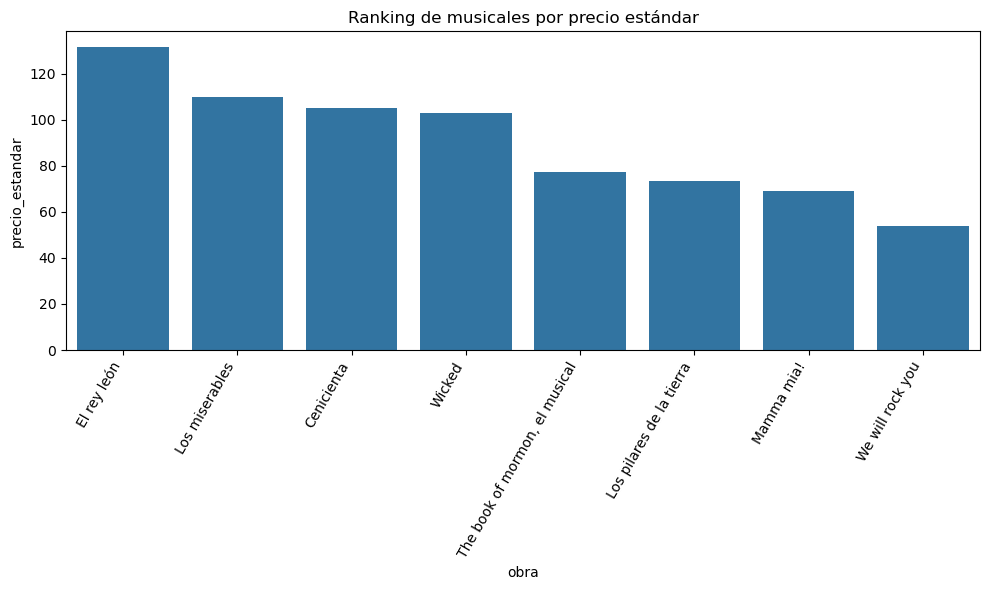

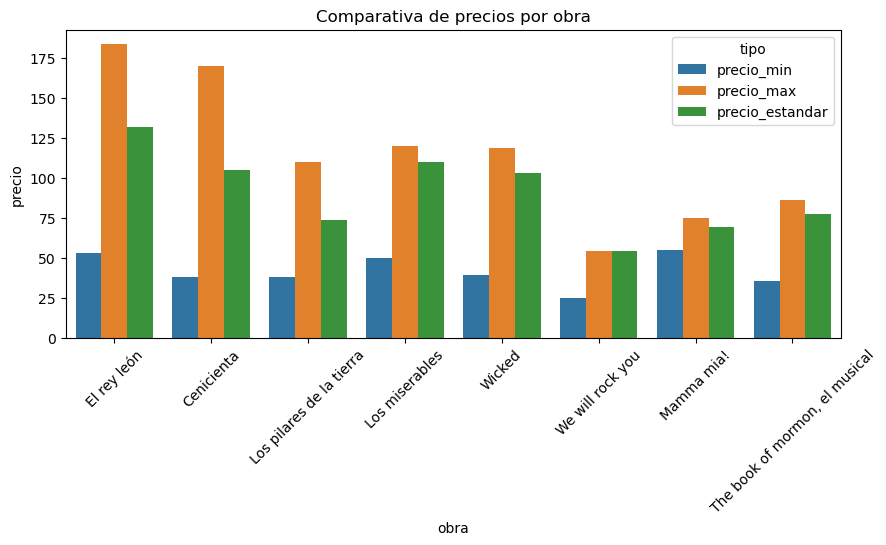

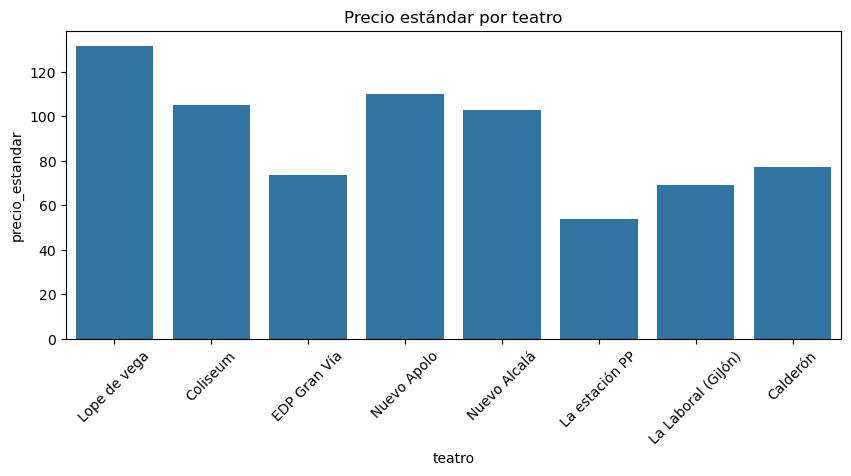

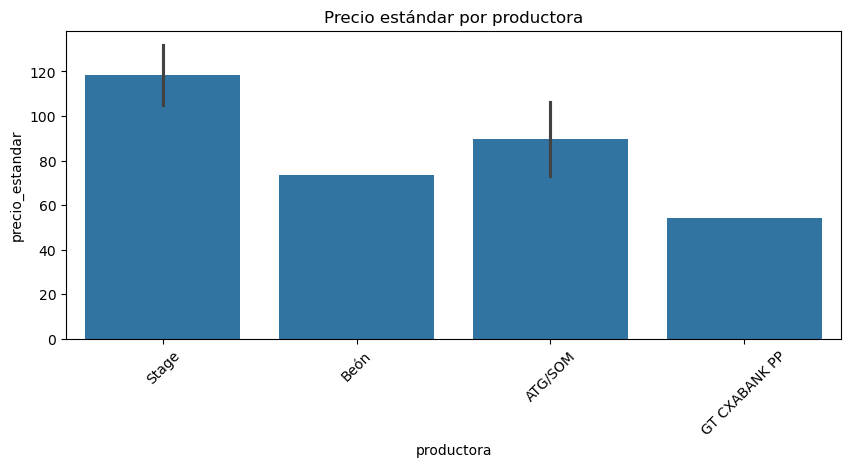

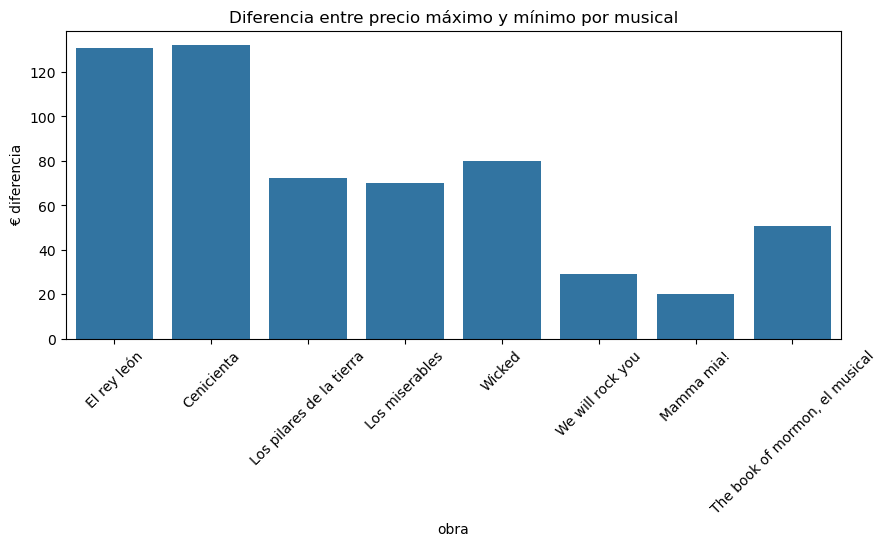

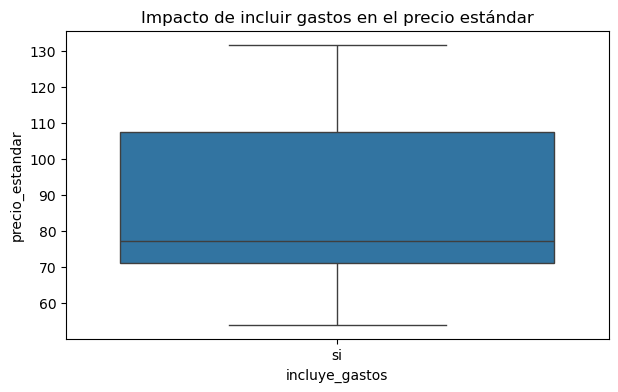

EDA completado y dataset exportado.


In [4]:



# ============================
# 3. Calidad del dato
# ============================

print("\nValores nulos por columna:")
print(df.isna().sum())

print("\nDuplicados:", df.duplicated().sum())

# ============================
# 4. Estadísticos descriptivos
# ============================

print("\nResumen estadístico de precios:")
print(df[["precio_min", "precio_max", "precio_estandar", "diferencia_precios"]].describe())

# ============================
# 5. Distribución de precios
# ============================

plt.figure(figsize=(8,4))
sns.histplot(df["precio_estandar"], kde=True)
plt.title("Distribución del precio estándar")
plt.xlabel("€")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(data=df[["precio_min","precio_max","precio_estandar"]])
plt.title("Caja de precios (min, max, estándar)")
plt.show()

# ============================
# 6. Ranking de musicales por precio estándar
# ============================

plt.figure(figsize=(10,6))  # más alto
sns.barplot(data=df.sort_values("precio_estandar", ascending=False),
            x="obra", y="precio_estandar")
plt.title("Ranking de musicales por precio estándar")
plt.xticks(rotation=60, ha="right")  # más rotación y alineación
plt.tight_layout()  # ajusta márgenes automáticamente
plt.show()

# ============================
# 7. Comparativa min / max / estándar por obra
# ============================

df_melt = df.melt(id_vars="obra",
                  value_vars=["precio_min","precio_max","precio_estandar"],
                  var_name="tipo", value_name="precio")

plt.figure(figsize=(10,4))
sns.barplot(data=df_melt, x="obra", y="precio", hue="tipo")
plt.title("Comparativa de precios por obra")
plt.xticks(rotation=45)
plt.show()

# ============================
# 8. Precios por teatro
# ============================

plt.figure(figsize=(10,4))
sns.barplot(data=df, x="teatro", y="precio_estandar")
plt.title("Precio estándar por teatro")
plt.xticks(rotation=45)
plt.show()

# ============================
# 9. Precios por productora
# ============================

plt.figure(figsize=(10,4))
sns.barplot(data=df, x="productora", y="precio_estandar")
plt.title("Precio estándar por productora")
plt.xticks(rotation=45)
plt.show()

# ============================
# 10. Diferencia entre precio mín y máx
# ============================

plt.figure(figsize=(10,4))
sns.barplot(data=df, x="obra", y="diferencia_precios")
plt.title("Diferencia entre precio máximo y mínimo por musical")
plt.xticks(rotation=45)
plt.ylabel("€ diferencia")
plt.show()

# ============================
# 11. Ver si incluir gastos impacta el precio
# ============================

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="incluye_gastos", y="precio_estandar")
plt.title("Impacto de incluir gastos en el precio estándar")
plt.show()

# ============================
# 12. Export final limpio (opcional)
# ============================

df.to_csv("precios_musicales_limpio_definitivo.csv", index=False)
print("EDA completado y dataset exportado.")


Conclusiones técnicas del EDA —

Dataset limpio (8×12), sin nulos, tipado correcto y variables listas para análisis descriptivo y comparativo.

Distribución del precio estándar

El precio estándar se concentra entre 70–120 €, sin outliers relevantes y con dispersión moderada.

Estructura de precios

Precio mínimo: estable (30–55 €).

Precio máximo: muy variable (60–180 €).

Precio estándar: rango medio (60–130 €).
La mayor volatilidad está en el precio máximo.

Ranking de musicales por precio estándar

Lideran El Rey León, Los Miserables y Cenicienta/Wicked.
Mamma Mia! y We Will Rock You forman el tramo bajo.

Comparativa por obra

Las producciones “premium” presentan mayores brechas min–max y mayor dispersión.
Las producciones itinerantes o familiares muestran estructuras de precio más consistentes.

Análisis por teatro

Nuevo Apolo, Coliseum y Lope de Vega concentran los precios más altos.
La Estación PP y La Laboral operan en niveles más bajos.

Análisis por productora

Stage aplica los precios estándar más elevados; Beon y Príncipe Pío operan en el rango económico; ATG/SOM mantiene precios intermedios.

Diferencia entre precio máximo y mínimo

Máximas brechas en El Rey León y Cenicienta (>120 €).
Mínimas brechas en Mamma Mia! y We Will Rock You (<40 €).
Esto evidencia estrategias de segmentación distintas por obra.

Impacto de incluir gastos

Incluir gastos incrementa el precio estándar y aumenta la variabilidad respecto a los casos sin gastos.